In [1]:
import warnings
warnings.filterwarnings("ignore")

import datetime
import inspect
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.optimize import curve_fit
import sympy as sym

In [2]:
repo_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'

confirmed_url = repo_url + 'time_series_covid19_confirmed_global.csv'
deaths_url = repo_url + 'time_series_covid19_deaths_global.csv'

In [3]:
data_confirmed = pd.read_csv(confirmed_url)
data_deaths = pd.read_csv(deaths_url)

In [4]:
data_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,35981,36036,36157,36263,36368,36471,36542,36675,36710,36710
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,4570,4637,4763,4880,4997,5105,5197,5276,5396,5519
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,26159,26764,27357,27973,28615,29229,29831,30394,30950,31465
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,897,897,897,907,907,918,922,925,925,925
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,880,916,932,950,1000,1078,1109,1148,1164,1199


In [5]:
data_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1225,1248,1259,1269,1270,1271,1271,1272,1283,1284
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,128,134,138,144,148,150,154,157,161,166
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1136,1146,1155,1163,1174,1186,1200,1210,1223,1231
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,35,39,40,41,47,48,51,52,54,55


In [6]:
data_argentina_confirmed = data_confirmed[data_confirmed['Country/Region'] == 'Argentina']
data_argentina_deaths = data_deaths[data_deaths['Country/Region'] == 'Argentina']

In [7]:
data_argentina_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,153520,158334,162526,167416,173355,178996,185373,191302,196543,201919


In [8]:
data_argentina_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,2807,2893,2939,3059,3179,3288,3441,3543,3596,3648


In [9]:
del data_argentina_confirmed['Lat']
del data_argentina_confirmed['Long']
del data_argentina_confirmed['Province/State']

del data_argentina_deaths['Lat']
del data_argentina_deaths['Long']
del data_argentina_deaths['Province/State']

In [10]:
data_argentina_confirmed.rename(columns={'Country/Region':'Date'}, inplace=True)
data_argentina_deaths.rename(columns={'Country/Region':'Date'}, inplace=True)

In [11]:
data_argentina_confirmed = data_argentina_confirmed.T
data_argentina_deaths = data_argentina_deaths.T

In [12]:
data_argentina_confirmed.head()

,6
Date,Argentina
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0


In [13]:
data_argentina_confirmed.columns = data_argentina_confirmed.iloc[0]
data_argentina_deaths.columns = data_argentina_deaths.iloc[0]

In [14]:
data_argentina_confirmed = data_argentina_confirmed.iloc[1:]
data_argentina_deaths = data_argentina_deaths.iloc[1:]

In [15]:
data_argentina_confirmed.rename(columns={'Argentina':'Total'}, inplace=True)
data_argentina_deaths.rename(columns={'Argentina':'Total'}, inplace=True)

In [16]:
data_argentina_confirmed.index = pd.to_datetime(data_argentina_confirmed.index.astype(str), format='%m/%d/%y')
data_argentina_deaths.index = pd.to_datetime(data_argentina_deaths.index.astype(str), format='%m/%d/%y')

In [17]:
data_argentina_confirmed.drop(data_argentina_confirmed[data_argentina_confirmed.index < '2020-03-01'].index, inplace=True)
data_argentina_deaths.drop(data_argentina_deaths[data_argentina_deaths.index < '2020-03-01'].index, inplace=True)

In [18]:
data_argentina_confirmed.head()

Date,Total
2020-03-01,0
2020-03-02,0
2020-03-03,1
2020-03-04,1
2020-03-05,1


In [19]:
def completeWithMean(column):
    return (column.shift() + column.shift(-1)) / 2

duplicated = data_argentina_confirmed.duplicated('Total')
data_argentina_confirmed.loc[duplicated, ['Total']] = np.NaN

data_argentina_confirmed.Total = np.where(data_argentina_confirmed['Total'].isnull(),
         completeWithMean(data_argentina_confirmed['Total']),
         data_argentina_confirmed['Total'])

data_argentina_confirmed.fillna(method='pad', inplace=True)
data_argentina_confirmed.Total = data_argentina_confirmed.Total.round().astype(int)

In [20]:
data_argentina_confirmed['New'] = (data_argentina_confirmed.Total - data_argentina_confirmed.Total.shift(1)).fillna(0).astype(int)

In [21]:
data_argentina_deaths.head()

Date,Total
2020-03-01,0
2020-03-02,0
2020-03-03,0
2020-03-04,0
2020-03-05,0


In [22]:
data_argentina_deaths['New'] = (data_argentina_deaths.Total - data_argentina_deaths.Total.shift(1)).fillna(0)

In [23]:
data_argentina = pd.merge(data_argentina_confirmed, data_argentina_deaths
                          , left_index=True, right_index=True
                          , suffixes=('ConfirmedCases', 'DeathCases'))

In [24]:
data_argentina

Date,TotalConfirmedCases,NewConfirmedCases,TotalDeathCases,NewDeathCases
2020-03-01,0,0,0,0
2020-03-02,0,0,0,0
2020-03-03,1,1,0,0
2020-03-04,1,0,0,0
2020-03-05,1,0,0,0
...,...,...,...,...
2020-07-29,178996,5641,3288,109
2020-07-30,185373,6377,3441,153
2020-07-31,191302,5929,3543,102
2020-08-01,196543,5241,3596,53


<AxesSubplot:title={'center':'Total Cases'}>

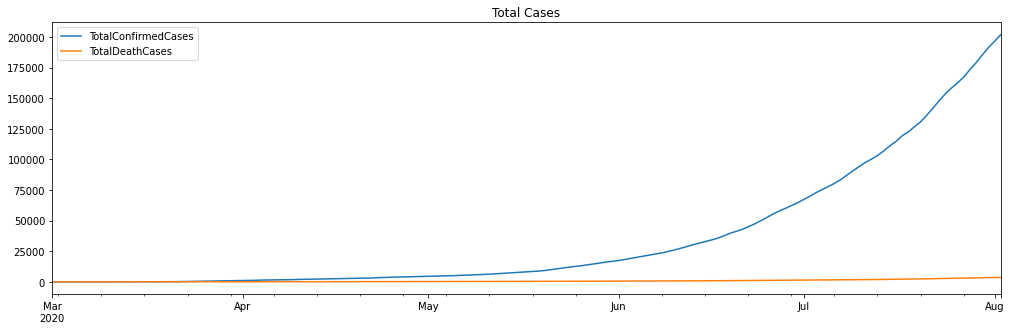

In [25]:
data_argentina.TotalConfirmedCases.plot(figsize=(17, 5), title="Total Cases", legend=True)
data_argentina.TotalDeathCases.plot(figsize=(17, 5), legend=True)

<AxesSubplot:title={'center':'New Cases'}>

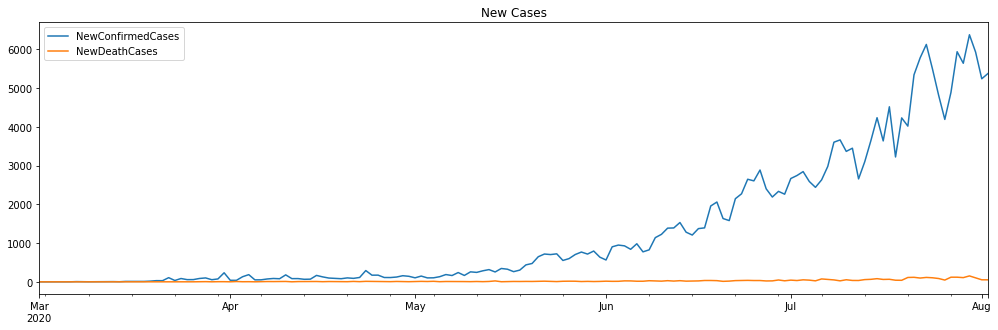

In [26]:
data_argentina.NewConfirmedCases.plot(figsize=(17, 5), title="New Cases", legend=True)
data_argentina.NewDeathCases.plot(figsize=(17, 5), legend=True)

In [27]:
data_argentina_confirmed

Date,Total,New
2020-03-01,0,0
2020-03-02,0,0
2020-03-03,1,1
2020-03-04,1,0
2020-03-05,1,0
...,...,...
2020-07-29,178996,5641
2020-07-30,185373,6377
2020-07-31,191302,5929
2020-08-01,196543,5241


In [28]:
data_argentina['num_id'] = np.arange(len(data_argentina) + 1)[1:]

In [29]:
#Testing only
#data_argentina = data_argentina.head(45)

In [30]:
data_argentina.head()

Date,TotalConfirmedCases,NewConfirmedCases,TotalDeathCases,NewDeathCases,num_id
2020-03-01,0,0,0,0,1
2020-03-02,0,0,0,0,2
2020-03-03,1,1,0,0,3
2020-03-04,1,0,0,0,4
2020-03-05,1,0,0,0,5


In [31]:
data_argentina.tail()

Date,TotalConfirmedCases,NewConfirmedCases,TotalDeathCases,NewDeathCases,num_id
2020-07-29,178996,5641,3288,109,151
2020-07-30,185373,6377,3441,153,152
2020-07-31,191302,5929,3543,102,153
2020-08-01,196543,5241,3596,53,154
2020-08-02,201919,5376,3648,52,155


In [32]:
predicted_days = 30
firstPredictionDay = data_argentina.index[-1] + datetime.timedelta(days = 1)

In [33]:
# testing only (remove last row to check results)
#data_argentina.drop(data_argentina.tail(1).index,inplace=True)

In [34]:
class Models:    
    def cuadratic_model(x, a, b, c):
        return (a*x**2 + b*x +c)

    def cubic_model(x, a, b, c, d):
        return (a*x**3 + b*x**2 +c*x + d)
    
    def fourth_pow_model(x, a, b, c, d, e):
        return (a*x**4 + b*x**3 +c*x**2 + d*x + e)
    
#    def fiveth_pow_model(x, a, b, c, d, e, f):
#        return (a*x**5 + b*x**4 +c*x**3 + d*x**2 + e*x + f)
#    
#    def sixh_pow_model(x, a, b, c, d, e, f, g):
#        return (a*x**6 + b*x**5 +c*x**4 + d*x**3 + e*x**2 + f*x + g)
#    
#    def exp_model(x, c, k):
#        return c * np.exp(k * x)

In [35]:
def formatPrediction(firstPredictionDay, day, prediction):
    formatedDate = str(firstPredictionDay + datetime.timedelta(days = day))[0:10]
    formatedPrediction = str(int(prediction))
    return "|" + formatedDate + " | " + formatedPrediction + "|"

def printPrediction(model, popt, x, y):
    firstPredictionDayId = x.max() + 1
    print("--- Predictions ---")
    for day in range (0, predicted_days):
        predictionId = firstPredictionDayId + day
        predictionValue = model(predictionId, *popt)
        print(formatPrediction(firstPredictionDay, day, predictionValue))
    print("-------------------")

In [36]:
def printFuncionParameters(model, popt):
        print('\n', model.__name__)
        args = inspect.getfullargspec(model).args[1:]
        for arg, value in zip(args, popt):
            print( arg, " = ", value)

def plotPrediction(model, popt, x, y):
    plt.figure()
    try:
        xs = sym.Symbol('\lambda')    
        tex = sym.latex(model(xs,*popt)).replace('$', '')
        plt.title(r'$f(\lambda)= %s$' %(tex),fontsize=12)
    except:
        printFuncionParameters(model, popt)

    plt.plot(x, model(x, *popt))
    plt.plot(x, y, 'ro')
    plt.show()

In [37]:
def predictData(model, x, y):
    popt, _ = curve_fit(model, x, y)
    printPrediction(model, popt, x, y)
    plotPrediction(model, popt, x, y)
    return popt

cuadratic_model
--- Predictions ---
|2020-08-03 | 172377|
|2020-08-04 | 175700|
|2020-08-05 | 179052|
|2020-08-06 | 182435|
|2020-08-07 | 185848|
|2020-08-08 | 189291|
|2020-08-09 | 192764|
|2020-08-10 | 196267|
|2020-08-11 | 199800|
|2020-08-12 | 203363|
|2020-08-13 | 206957|
|2020-08-14 | 210580|
|2020-08-15 | 214233|
|2020-08-16 | 217917|
|2020-08-17 | 221631|
|2020-08-18 | 225374|
|2020-08-19 | 229148|
|2020-08-20 | 232952|
|2020-08-21 | 236786|
|2020-08-22 | 240650|
|2020-08-23 | 244544|
|2020-08-24 | 248468|
|2020-08-25 | 252422|
|2020-08-26 | 256406|
|2020-08-27 | 260421|
|2020-08-28 | 264465|
|2020-08-29 | 268540|
|2020-08-30 | 272644|
|2020-08-31 | 276779|
|2020-09-01 | 280944|
-------------------


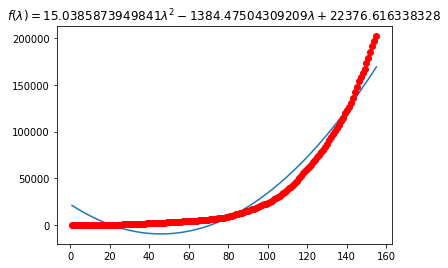

cubic_model
--- Predictions ---
|2020-08-03 | 202139|
|2020-08-04 | 207751|
|2020-08-05 | 213466|
|2020-08-06 | 219285|
|2020-08-07 | 225209|
|2020-08-08 | 231238|
|2020-08-09 | 237374|
|2020-08-10 | 243618|
|2020-08-11 | 249970|
|2020-08-12 | 256432|
|2020-08-13 | 263004|
|2020-08-14 | 269687|
|2020-08-15 | 276483|
|2020-08-16 | 283392|
|2020-08-17 | 290415|
|2020-08-18 | 297552|
|2020-08-19 | 304806|
|2020-08-20 | 312177|
|2020-08-21 | 319665|
|2020-08-22 | 327272|
|2020-08-23 | 334998|
|2020-08-24 | 342846|
|2020-08-25 | 350814|
|2020-08-26 | 358905|
|2020-08-27 | 367119|
|2020-08-28 | 375458|
|2020-08-29 | 383921|
|2020-08-30 | 392511|
|2020-08-31 | 401227|
|2020-09-01 | 410072|
-------------------


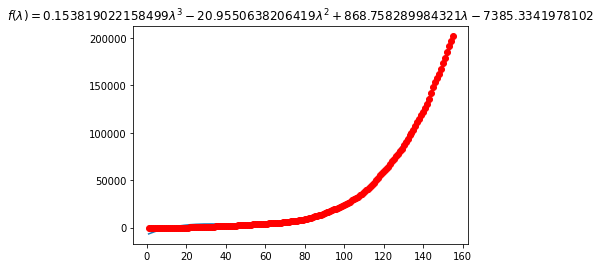

fourth_pow_model
--- Predictions ---
|2020-08-03 | 209354|
|2020-08-04 | 215890|
|2020-08-05 | 222583|
|2020-08-06 | 229435|
|2020-08-07 | 236447|
|2020-08-08 | 243623|
|2020-08-09 | 250965|
|2020-08-10 | 258476|
|2020-08-11 | 266158|
|2020-08-12 | 274014|
|2020-08-13 | 282046|
|2020-08-14 | 290257|
|2020-08-15 | 298651|
|2020-08-16 | 307228|
|2020-08-17 | 315993|
|2020-08-18 | 324948|
|2020-08-19 | 334095|
|2020-08-20 | 343438|
|2020-08-21 | 352979|
|2020-08-22 | 362721|
|2020-08-23 | 372667|
|2020-08-24 | 382819|
|2020-08-25 | 393181|
|2020-08-26 | 403756|
|2020-08-27 | 414545|
|2020-08-28 | 425553|
|2020-08-29 | 436782|
|2020-08-30 | 448236|
|2020-08-31 | 459916|
|2020-09-01 | 471827|
-------------------


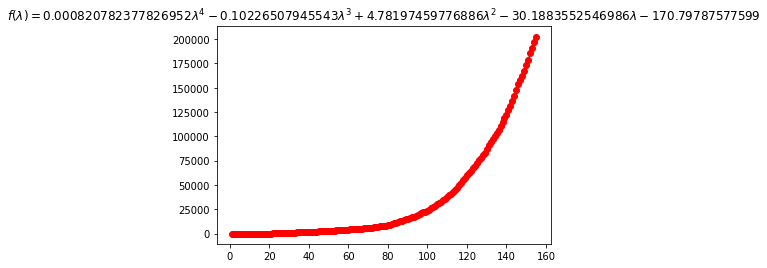

In [38]:
def isModel(methodName):
    return not(methodName.startswith('__'))

for methodName in dir(Models):
    if(isModel(methodName)):
        print(methodName)
        predictData(getattr(Models, methodName), data_argentina.num_id, data_argentina.TotalConfirmedCases)

----------------------------

In [ ]:
data_argentina.head(60)

In [ ]:
df_prophet_aux = data_argentina.drop(['NewConfirmedCases','TotalDeathCases','NewDeathCases','num_id'], axis=1).reset_index()
df_prophet = pd.DataFrame()
df_prophet['ds'] = df_prophet_aux['index']
df_prophet['y'] = df_prophet_aux['TotalConfirmedCases']
df_prophet.head(60)

In [ ]:
df_prophet.columns

In [ ]:
from fbprophet import Prophet
m = Prophet(growth='logistic') # the Prophet class (model)
m.fit(df_prophet) # fit the model using all data

In [ ]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction Stock Price using Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

In [ ]:
m.plot_components(prediction)
plt.show()